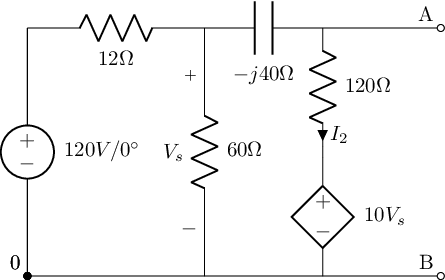

In [2]:
#
from lcapy import *

cej11=Circuit()
cej11.add("""
V1  _1  0    120       ; down,      l={$120V/ 0^{\circ}$}
R1  _1  _2   12        ; right=1.5 , l={$12\Omega$}
R2  _2  _0b  60        ; down=2    , l={$60\Omega$},v={$V_s$}
W1  _0b 0              ; left
C1  _2  _3   40        ; right     , l={$-j40\Omega$} 
R3  _3  _4b   120       ; down      , l={$120\Omega$}, i={$I_2$}
E1  _4  _0c  _2 _0b 10 ; down      , l=10 V_{s}
W2  _0c _0b            ; left
W3  _3  A              ; right
W4  _0c B              ; right
W5  _4b _4             ; down=0.1
""") 
cej11.draw()

Para calcular la tensión de Thevenin planteamos por ejemplo la sumas de tensiones en la rama de la derecha:
$V_{Th}=I_2\times 120\Omega+10V_s$ (1). Tendremos que calcular entonces $I_2$ y $V_s$.

Comenzamos calculando la corriente $I_2$, para esto resolvemos planteando el método de Corriente de Mallas.

$120V=I_1\times (12+60)\Omega-I_2\times 60 \Omega$ (2)

$-10V_s=-I_1\times 60\Omega + I_2\times (60+120-j40)\Omega$ (3)

Observando el circuito podemos plantear:

$V_s=(I_1-I2)\times 60 \Omega$ 

Entonces $-10V_s= 600I_2-600I_1$ (4)

Reemplazando en (2) el sistema queda:

$120V=I_1\times (12+60)\Omega-I_2\times 60 \Omega$ 

$0=I_1\times 540\Omega+I_2\times (-420-j40)\Omega$

Resolviendo este sistema encontramos que $I_1=(-7,33-j12)A$ y que $I_2=(-10,8-j14,4)A$

Ahora volviendo a (1)

$V_{Th}=I_2\times 120\Omega+10V_s=(-10,8-j14,4)A\times 120\Omega+10(I_1-I_2)\times 60 \Omega$

$=(-10,8-j14,4)A\times 120\Omega+10((-7,33-j12)A-(-10,8-j14,4)A)\times 60 \Omega$

$V_{Th}=835,22 \angle{-20,17°}[V]$

Ahora para calcular la impedancia de Thevenin debemos enmudecer los generadores independientes, y debido a que el circuito tiene un generador dependiente debemos conectar una fuente de tensión $V_x$en los terminales $A-B$ y calcular la corriente $I_x$ que circula por la misma:


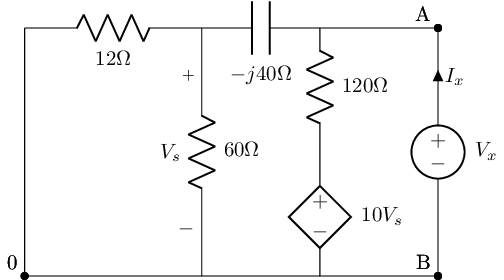

In [3]:
#
from lcapy import *

cej11=Circuit()
cej11.add("""
WV1  _1  0             ; down,   
R1  _1  _2   12        ; right=1.5 , l={$12\Omega$}
R2  _2  _0b  60        ; down=2    , l={$60\Omega$},v={$V_s$}
W1  _0b 0              ; left
C1  _2  _3   40        ; right     , l={$-j40\Omega$} 
R3  _3  _4b   120       ; down      , l={$120\Omega$}
E1  _4  _0c  _2 _0b 10 ; down      , l=10 V_{s}
W2  _0c _0b            ; left
W3  _3  A              ; right
W4  _0c B              ; right
W5  _4b _4             ; down=0.1
Vx A B                 ;down , i={I_x}
""") 
cej11.draw()

Resolvemos nuevamente por corrientes de mallas.

$0=I_1\times(12+60)\Omega-I_2\times 60\Omega-I_3\times 0\Omega$ (5)

$-10V_s=-I_1\times60+I_2\times(180-j40)\Omega-I_3\times 120\Omega$ (6)

$10V_s-V_x=-I_1\times 0\Omega-I_2\times 120\Omega+I3\times120\Omega$ (7)

Reemplazando (4) en (6) y (7) Obtenemos el siguiente sistema:

$0=I_1\times(12+60)\Omega-I_2\times 60\Omega-I_3\times 0\Omega$ 

$0=I_1\times540\Omega+I_2 \times(-420-j40)\Omega-I_3\times120\Omega$

$-V_x=-I_1\times600\Omega+I_2\times 480\Omega+I_3\times120\Omega$

Luego de resolverlo podemos calcular $Z_{Th}=\frac{V_x}{I_x}=\frac{V_x}{-I_3}=(120-j60)\Omega$$